In [1]:
import json
import numpy as np
import math
import random

In [2]:
train_text_label = json.load(open('../data/train_text_label.json', 'r'))
test_text_label = json.load(open('../data/test_text_label.json', 'r'))
print(train_text_label[0][0])
print(train_text_label[1][0])

女生 发表 轻生 日志 获 网友 连夜 搜 救 本报 讯 永别 朋友 永别 世界 前天 晚上 清华 毕业 女生 小陈 网 主页 写下 日志 后 失踪 日志 中 表示 欲 寻短见 得知 消息 校友 途径 连夜 发起 搜 救 昨天 上午 记者 了解 民警 已经 找到 小陈 已经 危险 了解 小 陈 本科 研究生 分别 就读 中国 传媒 大学 清华大学 今年 毕业 后 进入 国家机关 下属 媒体 工作 前天 晚上 7点 44分 小陈 网 主页 发表 篇 题为 永别 朋友 日志 后 失踪 篇 日志 很快 引起 关注 当天 晚上 10点 关注 清华大学 微 博 协会 会长 刘若晴 微 博 发布 紧急 寻 人 信息 呼吁 网友 路 留 心眼 儿 救人 命 随后 网友 展开 搜 救 昨天 上午 条 寻找 小 陈 微 博 已 转发 8000 次 小陈 同学 寻 遍 宣武门 长椿 街 西单 传媒 大学 清华大学 不断 网上 交流 搜 救 信息 汇总 清华大学 微 博 协会 微 博 从前 晚 10点 昨天 凌晨 3点 小时 新 搜 救 信息 上面 发布 昨天 上午 北京市 公安局 官方 微 博 发布消息 称 北京 警方 积极 努力 开展 相关 工作 随后 市 公安局 勤务 指挥部 传来 好 消息 警方 连夜 工作 民警 丰台 六里桥 附近 找到 同学 同学 平安无事 现场 自杀 情况 危险 民警 正在 进一步 调查 中

[2, 0, 0, 2, 0, 0, 0, 0, 0]


In [22]:
raw = json.load(open('processed.json', 'r'))
pos = [p for p in raw if p[1] == 1]
neg = [p for p in raw if p[1] == 0]

In [23]:
poslen = len(pos)
neglen = len(neg)
print(poslen, neglen)
# 5322 2444

random.shuffle(pos)
random.shuffle(neg)

5322 2444


In [24]:
train_pos = pos[: int(0.7 * poslen)]
test_pos = pos[int(0.7 * poslen): ]

train_neg = neg[: int(0.7 * neglen)]
test_neg = neg[int(0.7 * neglen): ]

In [25]:
trainset = train_pos + train_neg
testset = test_pos + test_neg

In [26]:
word_stat = dict()
emotion_cnt = list()
for i in range(2):
    word_stat[i] = dict()
    emotion_cnt.append(0)
for item in trainset:
    segments, lab = item[0], item[1]
    for seg in segments:
        if seg not in word_stat[lab]:
            word_stat[lab][seg] = 0
        word_stat[lab][seg] += 1
    emotion_cnt[lab] += 1

In [27]:
print(len(train_pos), emotion_cnt[1])

3725 3725


In [28]:
for i in range(2):
    toti = 0
    for freq in word_stat[i].values():
        toti += freq
    for k in word_stat[i]:
        word_stat[i][k] /= toti
    for k in word_stat[i]:
        word_stat[i][k] = math.log2(word_stat[i][k])

emotion_cnt = [math.log2(i) for i in emotion_cnt]

In [29]:
# for (segments, label) in testset:
#     print(segments, label)

In [30]:
def bayes(factor):
    cnter = 0
    miss = 0
    for (segments, label) in testset:
        scores = list()
        for i in range(2):
            # 类别不均衡，加上trade off 因子
            # score_i = emotion_cnt[i] * 2000
            # 1057
            score_i = emotion_cnt[i] * factor
            for seg in segments:
                if seg in word_stat[i]:
                    score_i += word_stat[i][seg]
            scores.append(score_i)
        if np.argmax(scores) == np.argmax(label):
            cnter += 1
    print('factor:', factor, 'cnt:', cnter, 'ratio:', cnter / len(testset))
    return [factor, cnter, cnter / len(testset)]

In [32]:
list_fac, list_cnt, list_rat = list(), list(), list()
for i in range(0, 500):
    f, c, r = bayes(i * 0.1)
    list_fac.append(f)
    list_cnt.append(c)
    list_rat.append(r)

factor: 0.0 cnt: 1188 ratio: 0.5096525096525096
factor: 0.1 cnt: 1186 ratio: 0.5087945087945088
factor: 0.2 cnt: 1182 ratio: 0.5070785070785071
factor: 0.30000000000000004 cnt: 1182 ratio: 0.5070785070785071
factor: 0.4 cnt: 1176 ratio: 0.5045045045045045
factor: 0.5 cnt: 1171 ratio: 0.5023595023595023
factor: 0.6000000000000001 cnt: 1166 ratio: 0.5002145002145002
factor: 0.7000000000000001 cnt: 1162 ratio: 0.4984984984984985
factor: 0.8 cnt: 1156 ratio: 0.49592449592449594
factor: 0.9 cnt: 1150 ratio: 0.49335049335049336
factor: 1.0 cnt: 1144 ratio: 0.49077649077649077
factor: 1.1 cnt: 1136 ratio: 0.4873444873444873
factor: 1.2000000000000002 cnt: 1135 ratio: 0.4869154869154869
factor: 1.3 cnt: 1130 ratio: 0.4847704847704848
factor: 1.4000000000000001 cnt: 1126 ratio: 0.48305448305448306
factor: 1.5 cnt: 1123 ratio: 0.48176748176748174
factor: 1.6 cnt: 1121 ratio: 0.48090948090948094
factor: 1.7000000000000002 cnt: 1115 ratio: 0.47833547833547835
factor: 1.8 cnt: 1112 ratio: 0.4770484

factor: 15.5 cnt: 662 ratio: 0.283998283998284
factor: 15.600000000000001 cnt: 662 ratio: 0.283998283998284
factor: 15.700000000000001 cnt: 661 ratio: 0.28356928356928357
factor: 15.8 cnt: 659 ratio: 0.2827112827112827
factor: 15.9 cnt: 654 ratio: 0.2805662805662806
factor: 16.0 cnt: 648 ratio: 0.277992277992278
factor: 16.1 cnt: 647 ratio: 0.2775632775632776
factor: 16.2 cnt: 646 ratio: 0.27713427713427713
factor: 16.3 cnt: 641 ratio: 0.274989274989275
factor: 16.400000000000002 cnt: 638 ratio: 0.2737022737022737
factor: 16.5 cnt: 635 ratio: 0.2724152724152724
factor: 16.6 cnt: 633 ratio: 0.27155727155727155
factor: 16.7 cnt: 630 ratio: 0.2702702702702703
factor: 16.8 cnt: 629 ratio: 0.2698412698412698
factor: 16.900000000000002 cnt: 629 ratio: 0.2698412698412698
factor: 17.0 cnt: 624 ratio: 0.2676962676962677
factor: 17.1 cnt: 623 ratio: 0.2672672672672673
factor: 17.2 cnt: 623 ratio: 0.2672672672672673
factor: 17.3 cnt: 622 ratio: 0.26683826683826684
factor: 17.400000000000002 cnt: 

factor: 31.0 cnt: 382 ratio: 0.16387816387816387
factor: 31.1 cnt: 381 ratio: 0.16344916344916344
factor: 31.200000000000003 cnt: 381 ratio: 0.16344916344916344
factor: 31.3 cnt: 380 ratio: 0.16302016302016303
factor: 31.400000000000002 cnt: 379 ratio: 0.1625911625911626
factor: 31.5 cnt: 378 ratio: 0.16216216216216217
factor: 31.6 cnt: 374 ratio: 0.16044616044616045
factor: 31.700000000000003 cnt: 373 ratio: 0.16001716001716002
factor: 31.8 cnt: 371 ratio: 0.15915915915915915
factor: 31.900000000000002 cnt: 369 ratio: 0.1583011583011583
factor: 32.0 cnt: 366 ratio: 0.15701415701415702
factor: 32.1 cnt: 366 ratio: 0.15701415701415702
factor: 32.2 cnt: 364 ratio: 0.15615615615615616
factor: 32.300000000000004 cnt: 359 ratio: 0.154011154011154
factor: 32.4 cnt: 358 ratio: 0.15358215358215357
factor: 32.5 cnt: 357 ratio: 0.15315315315315314
factor: 32.6 cnt: 356 ratio: 0.1527241527241527
factor: 32.7 cnt: 356 ratio: 0.1527241527241527
factor: 32.800000000000004 cnt: 355 ratio: 0.152295152

factor: 46.6 cnt: 231 ratio: 0.0990990990990991
factor: 46.7 cnt: 231 ratio: 0.0990990990990991
factor: 46.800000000000004 cnt: 229 ratio: 0.09824109824109824
factor: 46.900000000000006 cnt: 228 ratio: 0.0978120978120978
factor: 47.0 cnt: 227 ratio: 0.09738309738309739
factor: 47.1 cnt: 226 ratio: 0.09695409695409696
factor: 47.2 cnt: 226 ratio: 0.09695409695409696
factor: 47.300000000000004 cnt: 225 ratio: 0.09652509652509653
factor: 47.400000000000006 cnt: 224 ratio: 0.0960960960960961
factor: 47.5 cnt: 223 ratio: 0.09566709566709566
factor: 47.6 cnt: 223 ratio: 0.09566709566709566
factor: 47.7 cnt: 221 ratio: 0.09480909480909482
factor: 47.800000000000004 cnt: 221 ratio: 0.09480909480909482
factor: 47.900000000000006 cnt: 220 ratio: 0.09438009438009438
factor: 48.0 cnt: 220 ratio: 0.09438009438009438
factor: 48.1 cnt: 220 ratio: 0.09438009438009438
factor: 48.2 cnt: 218 ratio: 0.09352209352209352
factor: 48.300000000000004 cnt: 218 ratio: 0.09352209352209352
factor: 48.4000000000000

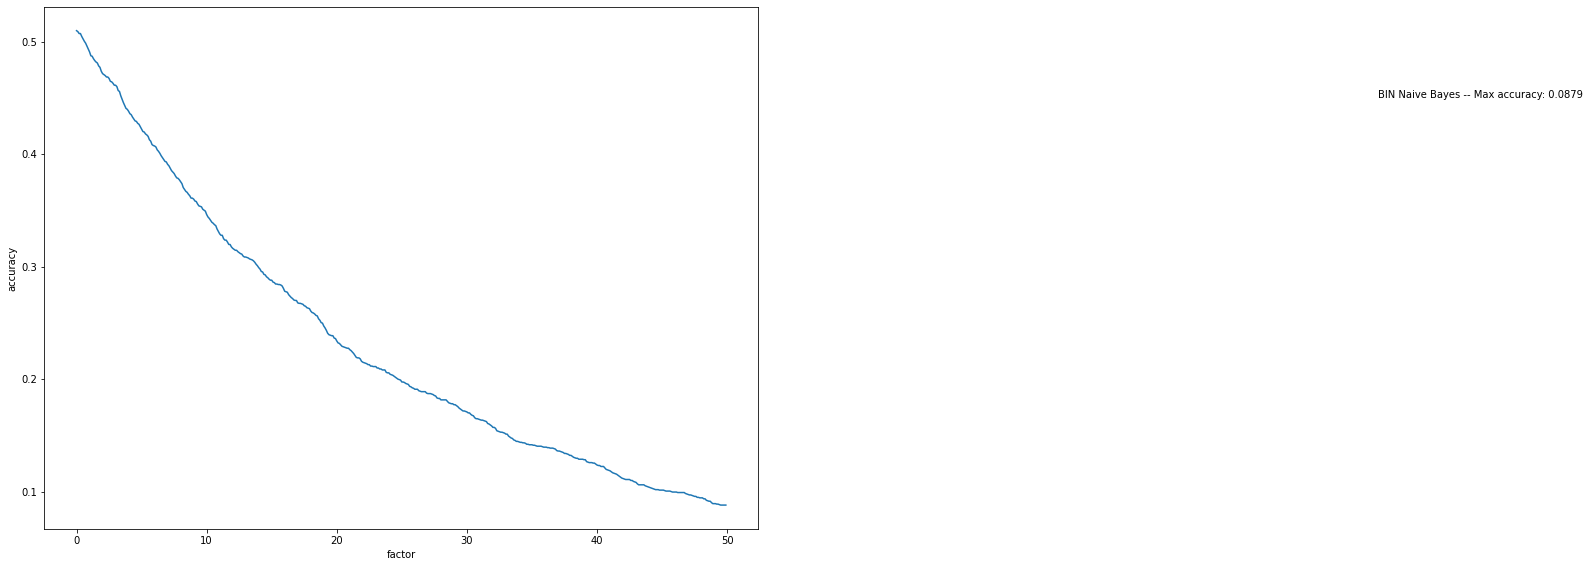

In [33]:
# binary
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12.8, 9.6))
# plt.figure(figsize=(12.8, 9.6))
plt.xlabel('factor')
plt.ylabel('accuracy')
plt.text(x=100, y=0.45, s='BIN Naive Bayes -- Max accuracy: %.4f ' % (list_rat[-1]))
plt.plot(list_fac, list_rat)
plt.savefig('Binimg.png')

In [35]:
list_fac, list_cnt, list_rat = list(), list(), list()
for i in range(0, 1000):
    f, c, r = bayes(i * 0.001)
    list_fac.append(f)
    list_cnt.append(c)
    list_rat.append(r)

factor: 0.0 cnt: 1188 ratio: 0.5096525096525096
factor: 0.001 cnt: 1187 ratio: 0.5092235092235092
factor: 0.002 cnt: 1187 ratio: 0.5092235092235092
factor: 0.003 cnt: 1187 ratio: 0.5092235092235092
factor: 0.004 cnt: 1187 ratio: 0.5092235092235092
factor: 0.005 cnt: 1187 ratio: 0.5092235092235092
factor: 0.006 cnt: 1187 ratio: 0.5092235092235092
factor: 0.007 cnt: 1187 ratio: 0.5092235092235092
factor: 0.008 cnt: 1187 ratio: 0.5092235092235092
factor: 0.009000000000000001 cnt: 1187 ratio: 0.5092235092235092
factor: 0.01 cnt: 1187 ratio: 0.5092235092235092
factor: 0.011 cnt: 1187 ratio: 0.5092235092235092
factor: 0.012 cnt: 1187 ratio: 0.5092235092235092
factor: 0.013000000000000001 cnt: 1187 ratio: 0.5092235092235092
factor: 0.014 cnt: 1186 ratio: 0.5087945087945088
factor: 0.015 cnt: 1186 ratio: 0.5087945087945088
factor: 0.016 cnt: 1186 ratio: 0.5087945087945088
factor: 0.017 cnt: 1186 ratio: 0.5087945087945088
factor: 0.018000000000000002 cnt: 1186 ratio: 0.5087945087945088
factor: 

factor: 0.165 cnt: 1185 ratio: 0.5083655083655083
factor: 0.166 cnt: 1185 ratio: 0.5083655083655083
factor: 0.167 cnt: 1185 ratio: 0.5083655083655083
factor: 0.168 cnt: 1185 ratio: 0.5083655083655083
factor: 0.169 cnt: 1185 ratio: 0.5083655083655083
factor: 0.17 cnt: 1185 ratio: 0.5083655083655083
factor: 0.171 cnt: 1185 ratio: 0.5083655083655083
factor: 0.17200000000000001 cnt: 1185 ratio: 0.5083655083655083
factor: 0.17300000000000001 cnt: 1185 ratio: 0.5083655083655083
factor: 0.17400000000000002 cnt: 1185 ratio: 0.5083655083655083
factor: 0.17500000000000002 cnt: 1185 ratio: 0.5083655083655083
factor: 0.176 cnt: 1185 ratio: 0.5083655083655083
factor: 0.177 cnt: 1185 ratio: 0.5083655083655083
factor: 0.178 cnt: 1185 ratio: 0.5083655083655083
factor: 0.179 cnt: 1185 ratio: 0.5083655083655083
factor: 0.18 cnt: 1185 ratio: 0.5083655083655083
factor: 0.181 cnt: 1185 ratio: 0.5083655083655083
factor: 0.182 cnt: 1184 ratio: 0.5079365079365079
factor: 0.183 cnt: 1184 ratio: 0.5079365079365

factor: 0.326 cnt: 1182 ratio: 0.5070785070785071
factor: 0.327 cnt: 1182 ratio: 0.5070785070785071
factor: 0.328 cnt: 1182 ratio: 0.5070785070785071
factor: 0.329 cnt: 1182 ratio: 0.5070785070785071
factor: 0.33 cnt: 1182 ratio: 0.5070785070785071
factor: 0.331 cnt: 1182 ratio: 0.5070785070785071
factor: 0.332 cnt: 1182 ratio: 0.5070785070785071
factor: 0.333 cnt: 1182 ratio: 0.5070785070785071
factor: 0.334 cnt: 1182 ratio: 0.5070785070785071
factor: 0.335 cnt: 1181 ratio: 0.5066495066495067
factor: 0.336 cnt: 1180 ratio: 0.5062205062205062
factor: 0.337 cnt: 1180 ratio: 0.5062205062205062
factor: 0.338 cnt: 1180 ratio: 0.5062205062205062
factor: 0.339 cnt: 1180 ratio: 0.5062205062205062
factor: 0.34 cnt: 1180 ratio: 0.5062205062205062
factor: 0.341 cnt: 1180 ratio: 0.5062205062205062
factor: 0.342 cnt: 1180 ratio: 0.5062205062205062
factor: 0.343 cnt: 1180 ratio: 0.5062205062205062
factor: 0.34400000000000003 cnt: 1180 ratio: 0.5062205062205062
factor: 0.34500000000000003 cnt: 1180 

factor: 0.489 cnt: 1171 ratio: 0.5023595023595023
factor: 0.49 cnt: 1171 ratio: 0.5023595023595023
factor: 0.491 cnt: 1171 ratio: 0.5023595023595023
factor: 0.492 cnt: 1171 ratio: 0.5023595023595023
factor: 0.493 cnt: 1171 ratio: 0.5023595023595023
factor: 0.494 cnt: 1171 ratio: 0.5023595023595023
factor: 0.495 cnt: 1171 ratio: 0.5023595023595023
factor: 0.496 cnt: 1171 ratio: 0.5023595023595023
factor: 0.497 cnt: 1171 ratio: 0.5023595023595023
factor: 0.498 cnt: 1171 ratio: 0.5023595023595023
factor: 0.499 cnt: 1171 ratio: 0.5023595023595023
factor: 0.5 cnt: 1171 ratio: 0.5023595023595023
factor: 0.501 cnt: 1171 ratio: 0.5023595023595023
factor: 0.502 cnt: 1171 ratio: 0.5023595023595023
factor: 0.503 cnt: 1171 ratio: 0.5023595023595023
factor: 0.504 cnt: 1170 ratio: 0.5019305019305019
factor: 0.505 cnt: 1170 ratio: 0.5019305019305019
factor: 0.506 cnt: 1170 ratio: 0.5019305019305019
factor: 0.507 cnt: 1170 ratio: 0.5019305019305019
factor: 0.508 cnt: 1170 ratio: 0.5019305019305019
fac

factor: 0.649 cnt: 1163 ratio: 0.49892749892749894
factor: 0.65 cnt: 1163 ratio: 0.49892749892749894
factor: 0.651 cnt: 1163 ratio: 0.49892749892749894
factor: 0.652 cnt: 1163 ratio: 0.49892749892749894
factor: 0.653 cnt: 1163 ratio: 0.49892749892749894
factor: 0.654 cnt: 1163 ratio: 0.49892749892749894
factor: 0.655 cnt: 1163 ratio: 0.49892749892749894
factor: 0.656 cnt: 1163 ratio: 0.49892749892749894
factor: 0.657 cnt: 1163 ratio: 0.49892749892749894
factor: 0.658 cnt: 1163 ratio: 0.49892749892749894
factor: 0.659 cnt: 1163 ratio: 0.49892749892749894
factor: 0.66 cnt: 1163 ratio: 0.49892749892749894
factor: 0.661 cnt: 1163 ratio: 0.49892749892749894
factor: 0.662 cnt: 1163 ratio: 0.49892749892749894
factor: 0.663 cnt: 1163 ratio: 0.49892749892749894
factor: 0.664 cnt: 1163 ratio: 0.49892749892749894
factor: 0.665 cnt: 1163 ratio: 0.49892749892749894
factor: 0.666 cnt: 1163 ratio: 0.49892749892749894
factor: 0.667 cnt: 1162 ratio: 0.4984984984984985
factor: 0.668 cnt: 1162 ratio: 0.4

factor: 0.81 cnt: 1156 ratio: 0.49592449592449594
factor: 0.811 cnt: 1156 ratio: 0.49592449592449594
factor: 0.812 cnt: 1156 ratio: 0.49592449592449594
factor: 0.8130000000000001 cnt: 1156 ratio: 0.49592449592449594
factor: 0.8140000000000001 cnt: 1156 ratio: 0.49592449592449594
factor: 0.8150000000000001 cnt: 1156 ratio: 0.49592449592449594
factor: 0.8160000000000001 cnt: 1156 ratio: 0.49592449592449594
factor: 0.8170000000000001 cnt: 1156 ratio: 0.49592449592449594
factor: 0.8180000000000001 cnt: 1156 ratio: 0.49592449592449594
factor: 0.8190000000000001 cnt: 1156 ratio: 0.49592449592449594
factor: 0.8200000000000001 cnt: 1156 ratio: 0.49592449592449594
factor: 0.8210000000000001 cnt: 1156 ratio: 0.49592449592449594
factor: 0.8220000000000001 cnt: 1156 ratio: 0.49592449592449594
factor: 0.8230000000000001 cnt: 1156 ratio: 0.49592449592449594
factor: 0.8240000000000001 cnt: 1156 ratio: 0.49592449592449594
factor: 0.8250000000000001 cnt: 1156 ratio: 0.49592449592449594
factor: 0.826000

factor: 0.963 cnt: 1144 ratio: 0.49077649077649077
factor: 0.964 cnt: 1144 ratio: 0.49077649077649077
factor: 0.965 cnt: 1144 ratio: 0.49077649077649077
factor: 0.966 cnt: 1144 ratio: 0.49077649077649077
factor: 0.967 cnt: 1144 ratio: 0.49077649077649077
factor: 0.968 cnt: 1144 ratio: 0.49077649077649077
factor: 0.969 cnt: 1144 ratio: 0.49077649077649077
factor: 0.97 cnt: 1144 ratio: 0.49077649077649077
factor: 0.971 cnt: 1144 ratio: 0.49077649077649077
factor: 0.972 cnt: 1144 ratio: 0.49077649077649077
factor: 0.973 cnt: 1144 ratio: 0.49077649077649077
factor: 0.974 cnt: 1144 ratio: 0.49077649077649077
factor: 0.975 cnt: 1144 ratio: 0.49077649077649077
factor: 0.976 cnt: 1144 ratio: 0.49077649077649077
factor: 0.977 cnt: 1144 ratio: 0.49077649077649077
factor: 0.978 cnt: 1144 ratio: 0.49077649077649077
factor: 0.979 cnt: 1144 ratio: 0.49077649077649077
factor: 0.98 cnt: 1144 ratio: 0.49077649077649077
factor: 0.981 cnt: 1144 ratio: 0.49077649077649077
factor: 0.982 cnt: 1144 ratio: 0.

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12.8, 9.6))
# plt.figure(figsize=(12.8, 9.6))
plt.xlabel('factor')
plt.ylabel('accuracy')
plt.text(x=100, y=0.45, s='BIN Naive Bayes -- Max accuracy: %.4f ' % (list_rat[-1]))
plt.plot(list_fac, list_rat)
plt.savefig('BinimgDense.png')

In [15]:
# word_stat = dict()
# emotion_cnt = list()
# for i in range(2):
#     word_stat[i] = dict()
#     emotion_cnt.append(0)
# for text, label in zip(train_text_label[0], train_text_label[1]):
#     for seg in text.split():
#         if seg not in word_stat[np.argmax(label[1:])]:
#             word_stat[np.argmax(label[1:])][seg] = 0
#         word_stat[np.argmax(label[1:])][seg] += 1
#     emotion_cnt[np.argmax(label[1:])] += 1
# # word_stat[np.argmax(train_text_label[1][0][1:])] = train_text_label[0][0].split()
# # len(word_stat)

In [21]:
# len(word_stat[0])
# uniq_words = set(word_stat[0])
# dic = dict()
# for w in uniq_words:
#     dic[w] = word_stat[0].count(w)

In [31]:
print(word_stat[0]['数'])
print(word_stat[1]['数'])
print(emotion_cnt)

51
17
[416, 124, 145, 984, 367, 180, 99, 27]


In [32]:
# # eord_stat and emotion cnt
# with open('wordstatDic_emocntList.json', 'w') as f:
#     json.dump([word_stat, emotion_cnt], f)

In [53]:
for i in range(8):
    toti = 0
    for freq in word_stat[i].values():
        toti += freq
    for k in word_stat[i]:
        word_stat[i][k] /= toti
    for k in word_stat[i]:
        word_stat[i][k] = math.log2(word_stat[i][k])

emotion_cnt = [math.log2(i) for i in emotion_cnt]

In [56]:
prob = 0
for v in word_stat[0].values():
    prob += v
print(prob)
print(word_stat[0]['老太'])

print(emotion_cnt)

# 1.0000000000002014
# 8.148299042574862e-05
# [416, 124, 145, 984, 367, 180, 99, 27]

-323235.1472357542
-13.58314154625341
[8.700439718141093, 6.954196310386875, 7.1799090900149345, 9.94251450533924, 8.519636252843213, 7.491853096329675, 6.6293566200796095, 4.754887502163468]


In [89]:
def bayes(factor):
    cnter = 0
    miss = 0
    for text, label in zip(test_text_label[0], test_text_label[1]):
        scores = list()
        segments = text.split()
        for i in range(8):
            # 类别不均衡，加上trade off 因子
            # score_i = emotion_cnt[i] * 2000
            # 1057
            score_i = emotion_cnt[i] * factor
            for seg in segments:
                if seg in word_stat[i]:
                    score_i += word_stat[i][seg]
            scores.append(score_i)
        if np.argmax(scores) == np.argmax(label[1:]):
            cnter += 1
    print('factor:', factor, 'cnt:', cnter, 'ratio:', cnter / len(test_text_label[1]))
    return [factor, cnter, cnter / len(test_text_label[1])]

In [94]:
list_fac, list_cnt, list_rat = list(), list(), list()
for i in range(50, 3000, 5):
    f, c, r = bayes(i)
    list_fac.append(f)
    list_cnt.append(c)
    list_rat.append(r)

factor: 50 cnt: 14 ratio: 0.0062836624775583485
factor: 55 cnt: 13 ratio: 0.0058348294434470375
factor: 60 cnt: 13 ratio: 0.0058348294434470375
factor: 65 cnt: 16 ratio: 0.00718132854578097
factor: 70 cnt: 17 ratio: 0.00763016157989228
factor: 75 cnt: 19 ratio: 0.008527827648114902
factor: 80 cnt: 21 ratio: 0.009425493716337522
factor: 85 cnt: 20 ratio: 0.008976660682226212
factor: 90 cnt: 23 ratio: 0.010323159784560144
factor: 95 cnt: 25 ratio: 0.011220825852782765
factor: 100 cnt: 26 ratio: 0.011669658886894075
factor: 105 cnt: 29 ratio: 0.013016157989228007
factor: 110 cnt: 33 ratio: 0.01481149012567325
factor: 115 cnt: 40 ratio: 0.017953321364452424
factor: 120 cnt: 44 ratio: 0.019748653500897665
factor: 125 cnt: 54 ratio: 0.02423698384201077
factor: 130 cnt: 60 ratio: 0.026929982046678635
factor: 135 cnt: 65 ratio: 0.02917414721723519
factor: 140 cnt: 73 ratio: 0.032764811490125674
factor: 145 cnt: 85 ratio: 0.0381508078994614
factor: 150 cnt: 94 ratio: 0.0421903052064632
factor: 

factor: 925 cnt: 957 ratio: 0.42953321364452424
factor: 930 cnt: 960 ratio: 0.43087971274685816
factor: 935 cnt: 961 ratio: 0.43132854578096946
factor: 940 cnt: 962 ratio: 0.43177737881508077
factor: 945 cnt: 963 ratio: 0.4322262118491921
factor: 950 cnt: 965 ratio: 0.43312387791741475
factor: 955 cnt: 966 ratio: 0.43357271095152605
factor: 960 cnt: 967 ratio: 0.43402154398563736
factor: 965 cnt: 968 ratio: 0.43447037701974867
factor: 970 cnt: 968 ratio: 0.43447037701974867
factor: 975 cnt: 971 ratio: 0.4358168761220826
factor: 980 cnt: 972 ratio: 0.4362657091561939
factor: 985 cnt: 972 ratio: 0.4362657091561939
factor: 990 cnt: 972 ratio: 0.4362657091561939
factor: 995 cnt: 974 ratio: 0.4371633752244165
factor: 1000 cnt: 977 ratio: 0.4385098743267504
factor: 1005 cnt: 978 ratio: 0.43895870736086173
factor: 1010 cnt: 978 ratio: 0.43895870736086173
factor: 1015 cnt: 978 ratio: 0.43895870736086173
factor: 1020 cnt: 980 ratio: 0.4398563734290844
factor: 1025 cnt: 981 ratio: 0.440305206463

factor: 1775 cnt: 1049 ratio: 0.4708258527827648
factor: 1780 cnt: 1049 ratio: 0.4708258527827648
factor: 1785 cnt: 1049 ratio: 0.4708258527827648
factor: 1790 cnt: 1050 ratio: 0.47127468581687615
factor: 1795 cnt: 1050 ratio: 0.47127468581687615
factor: 1800 cnt: 1050 ratio: 0.47127468581687615
factor: 1805 cnt: 1050 ratio: 0.47127468581687615
factor: 1810 cnt: 1050 ratio: 0.47127468581687615
factor: 1815 cnt: 1051 ratio: 0.47172351885098746
factor: 1820 cnt: 1051 ratio: 0.47172351885098746
factor: 1825 cnt: 1051 ratio: 0.47172351885098746
factor: 1830 cnt: 1051 ratio: 0.47172351885098746
factor: 1835 cnt: 1052 ratio: 0.47217235188509876
factor: 1840 cnt: 1052 ratio: 0.47217235188509876
factor: 1845 cnt: 1052 ratio: 0.47217235188509876
factor: 1850 cnt: 1052 ratio: 0.47217235188509876
factor: 1855 cnt: 1052 ratio: 0.47217235188509876
factor: 1860 cnt: 1052 ratio: 0.47217235188509876
factor: 1865 cnt: 1052 ratio: 0.47217235188509876
factor: 1870 cnt: 1052 ratio: 0.47217235188509876
fac

factor: 2615 cnt: 1062 ratio: 0.47666068222621183
factor: 2620 cnt: 1062 ratio: 0.47666068222621183
factor: 2625 cnt: 1062 ratio: 0.47666068222621183
factor: 2630 cnt: 1062 ratio: 0.47666068222621183
factor: 2635 cnt: 1062 ratio: 0.47666068222621183
factor: 2640 cnt: 1062 ratio: 0.47666068222621183
factor: 2645 cnt: 1062 ratio: 0.47666068222621183
factor: 2650 cnt: 1062 ratio: 0.47666068222621183
factor: 2655 cnt: 1062 ratio: 0.47666068222621183
factor: 2660 cnt: 1062 ratio: 0.47666068222621183
factor: 2665 cnt: 1062 ratio: 0.47666068222621183
factor: 2670 cnt: 1062 ratio: 0.47666068222621183
factor: 2675 cnt: 1062 ratio: 0.47666068222621183
factor: 2680 cnt: 1062 ratio: 0.47666068222621183
factor: 2685 cnt: 1062 ratio: 0.47666068222621183
factor: 2690 cnt: 1062 ratio: 0.47666068222621183
factor: 2695 cnt: 1062 ratio: 0.47666068222621183
factor: 2700 cnt: 1062 ratio: 0.47666068222621183
factor: 2705 cnt: 1062 ratio: 0.47666068222621183
factor: 2710 cnt: 1062 ratio: 0.47666068222621183


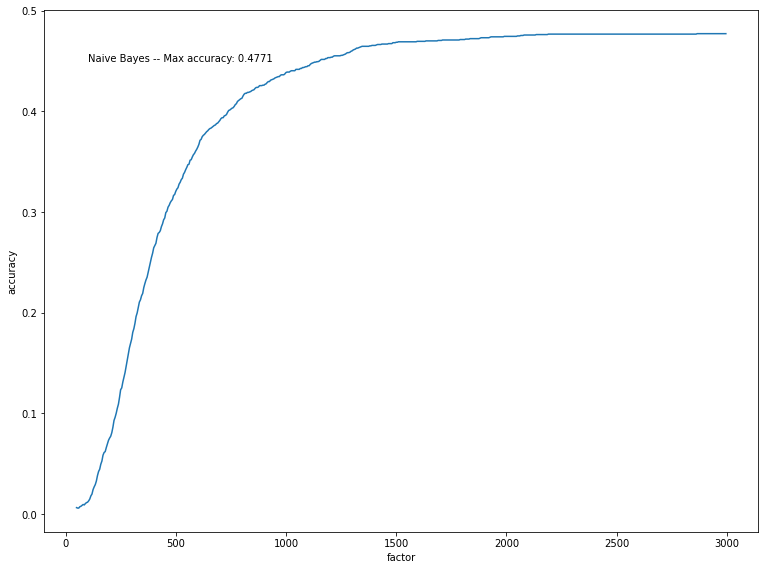

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12.8, 9.6))
plt.xlabel('factor')
plt.ylabel('accuracy')
plt.text(x=100, y=0.45, s='Naive Bayes -- Max accuracy: %.4f ' % (list_rat[-1]))
plt.plot(list_fac, list_rat)
plt.savefig('img.png')

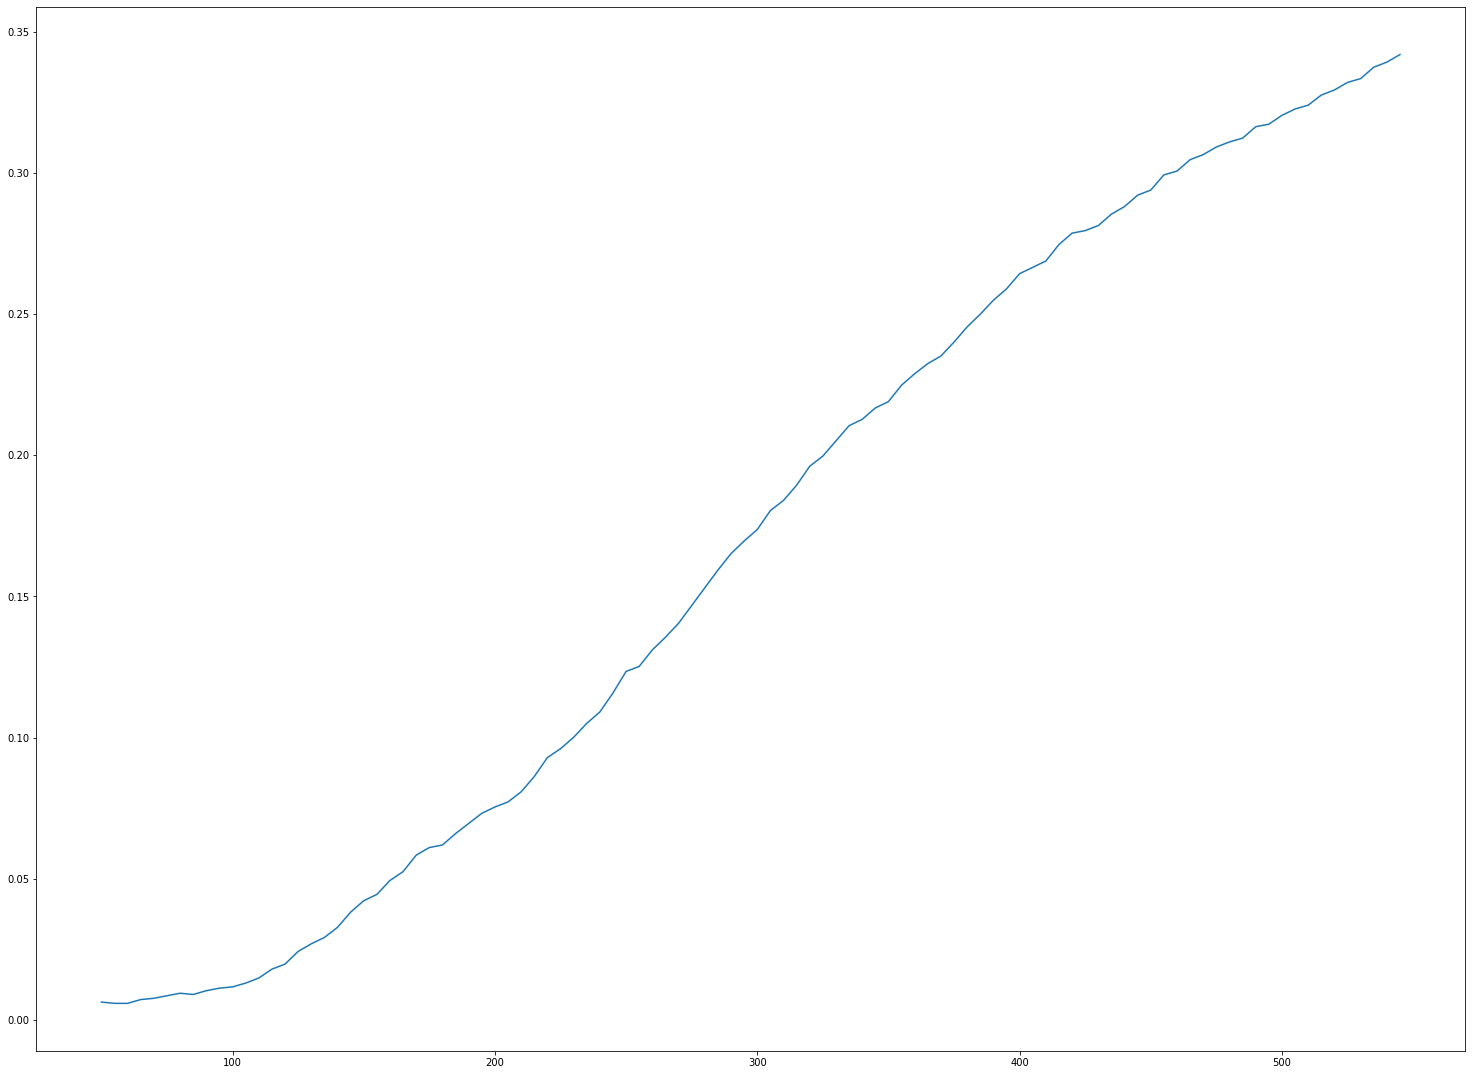

In [102]:
plt.figure(figsize=(12.8 * 2, 9.6 * 2))
plt.plot(list_fac[:100], list_rat[:100])

In [99]:
bayes(5000)
bayes(100000)

factor: 5000 cnt: 1064 ratio: 0.47755834829443444
factor: 100000 cnt: 1064 ratio: 0.47755834829443444


[100000, 1064, 0.47755834829443444]

In [ ]:
# bayes(10000)